In [1]:
import json
from utils.visualization import plot_train_metrics, plot_test_metrics, compare_test_metrics, iter_ratios, plot_cp, plot_speed, plot_speed_acc
from utils.general import calc_total_ratio
import matplotlib.pyplot as plt
import torch
from torchvision import models
from models.pruning import Pruning

# Without Retraining

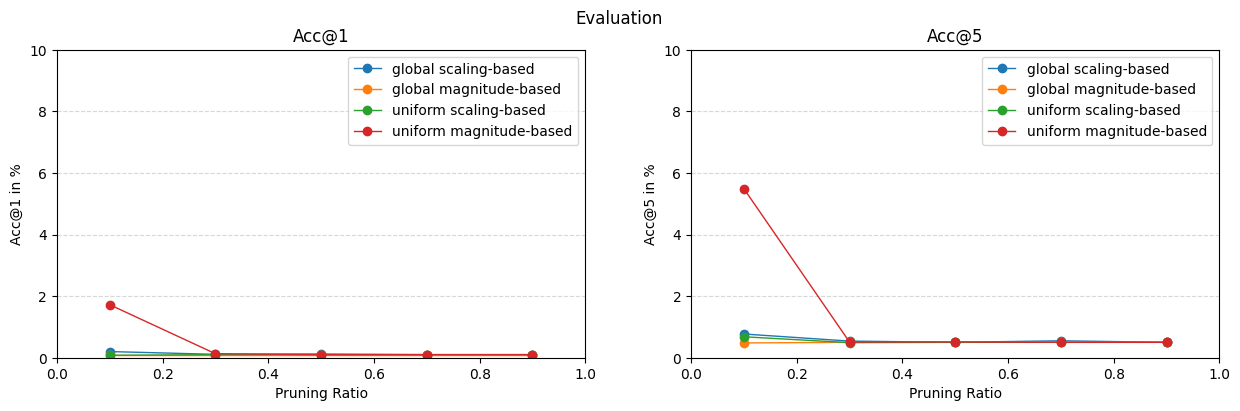

In [2]:
with open('../runs/without_retraining/global_batchnorm.json', 'r') as f:
    data1 = json.load(f)
with open('../runs/without_retraining/global_magnitude.json', 'r') as f:
    data2 = json.load(f)
with open('../runs/without_retraining/layerwise_batchnorm.json', 'r') as f:
    data3 = json.load(f)
with open('../runs/without_retraining/layerwise_magnitude.json', 'r') as f:
    data4 = json.load(f)

datas = [data1, data2, data3, data4]
labels = ["global scaling-based", "global magnitude-based", "uniform scaling-based", "uniform magnitude-based"]

compare_test_metrics(datas, labels)

# Retraining

## Global Scaling-based Pruning

In [75]:
with open('../runs/scaling_pruning/retraining.json', 'r') as f:
    data = json.load(f)

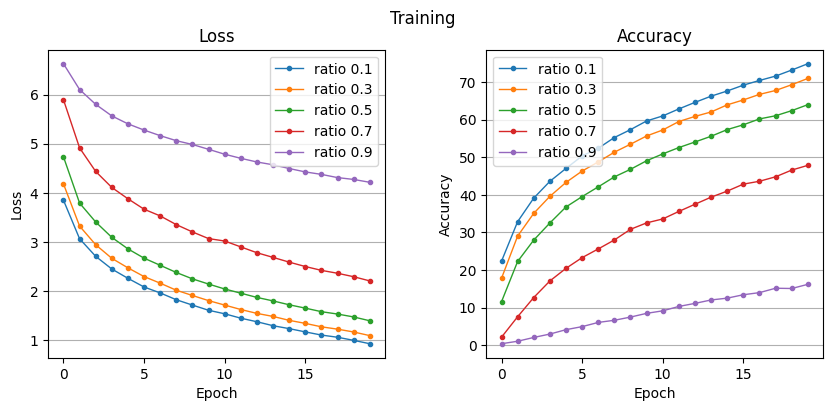

In [76]:
plot_train_metrics(data)

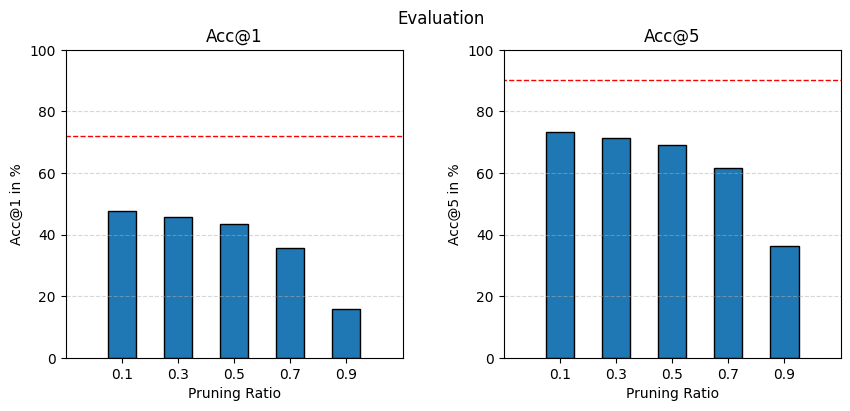

In [77]:
plot_test_metrics(data)

## Global Magntude-based Pruning

In [78]:
with open('../runs/magnitude_pruning/retraining.json', 'r') as f:
    data = json.load(f)

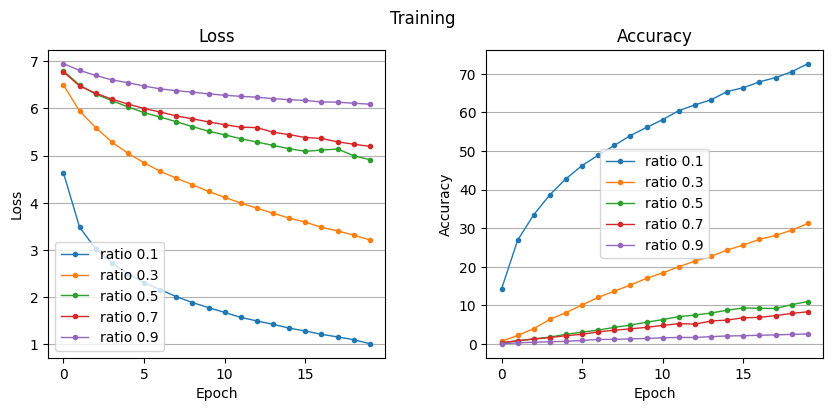

In [79]:
plot_train_metrics(data)

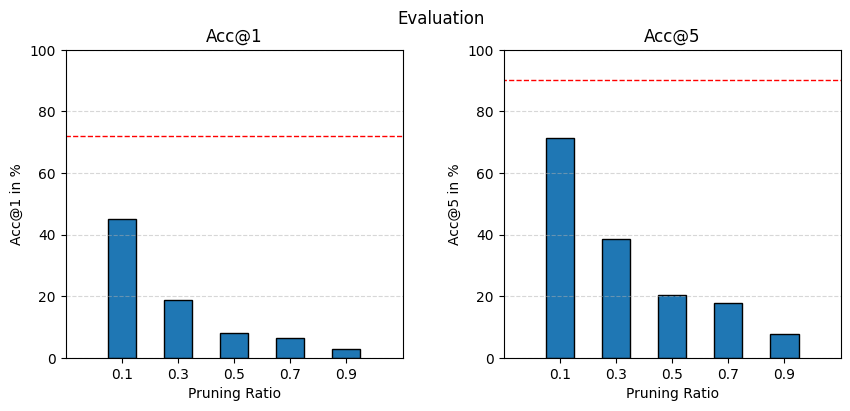

In [80]:
plot_test_metrics(data)

## Uniform Scaling-Based Pruning

In [81]:
with open('../runs/uniform_scaling_pruning/retraining.json', 'r') as f:
    data = json.load(f)

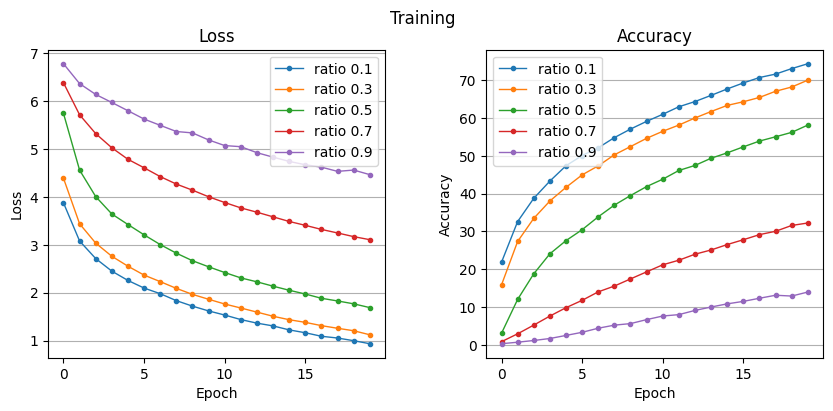

In [82]:
plot_train_metrics(data)

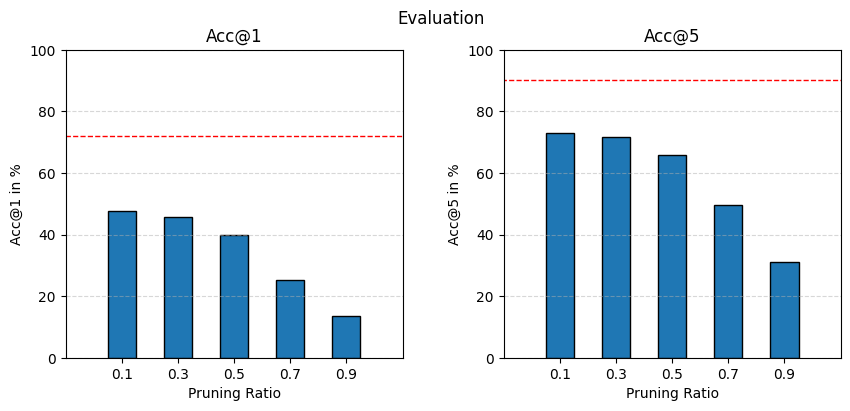

In [83]:
plot_test_metrics(data)

## Iterative Pruning

In [4]:
with open('../runs/iterative_pruning/iterative_pruning.json', 'r') as f:
    data = json.load(f)

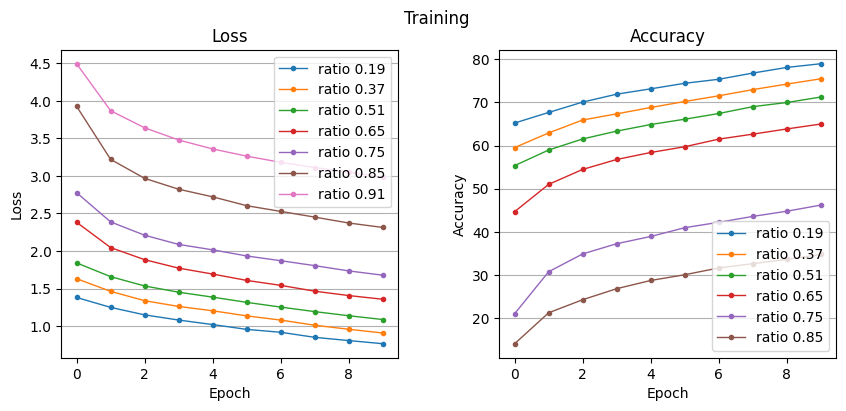

In [5]:
plot_train_metrics(data)

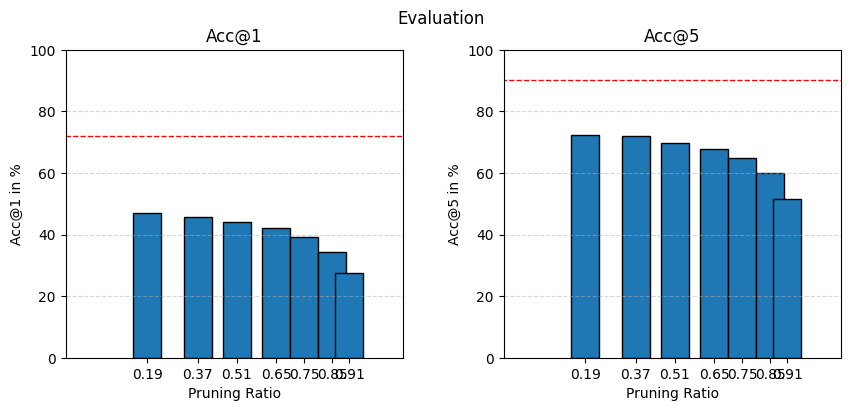

In [6]:
plot_test_metrics(data)

### Epoch X 2

In [12]:
with open('../runs/iterative_pruning/iterative_pruning_40.json', 'r') as f:
    data = json.load(f)

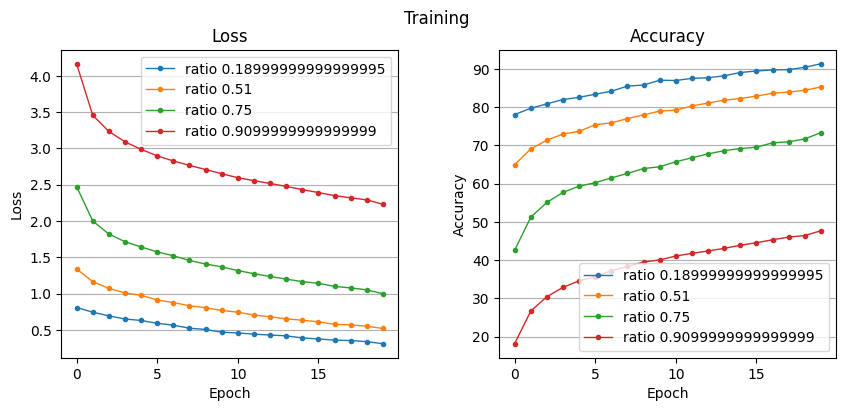

In [13]:
plot_train_metrics(data)

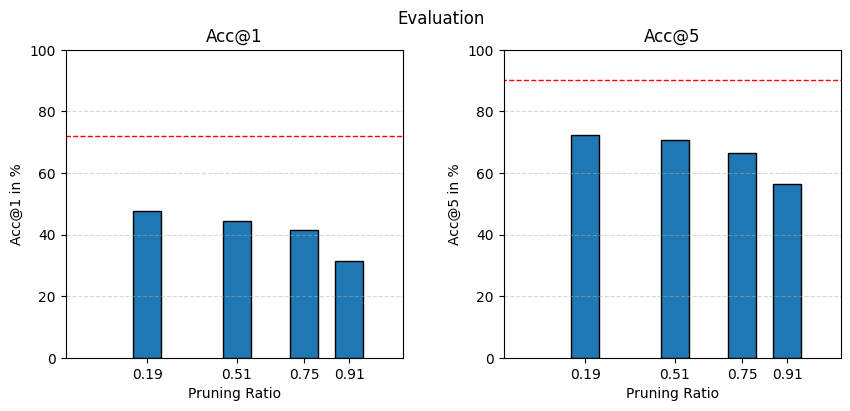

In [8]:
plot_test_metrics(data)

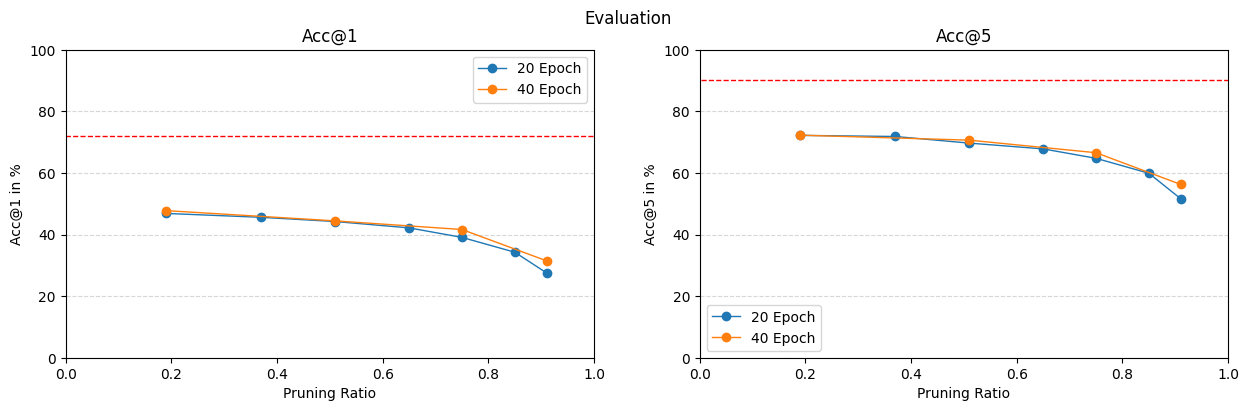

In [6]:
import json
with open('../runs/iterative_pruning/iterative_pruning.json', 'r') as f:
    data1 = json.load(f)
with open('../runs/iterative_pruning/iterative_pruning_40.json', 'r') as f:
    data2 = json.load(f)

datas = [data1, data2]
labels = ["20 Epoch", "40 Epoch"]

compare_test_metrics(datas, labels)

## Knowledge Distillation

### Output Logits 

In [3]:
with open('../runs/knowledge_distillation/logits_kd.json', 'r') as f:
    data = json.load(f)

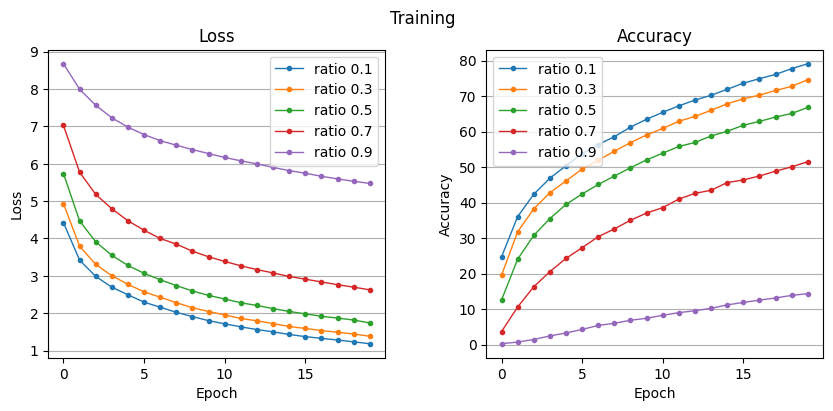

In [4]:
plot_train_metrics(data)

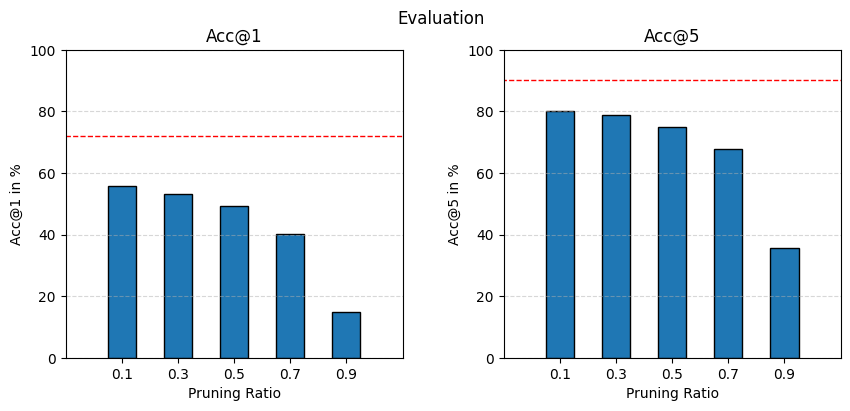

In [5]:
plot_test_metrics(data)

### Intermediate Feature

In [2]:
with open('../runs/knowledge_distillation/intermediate_kd.json', 'r') as f:
    data = json.load(f)

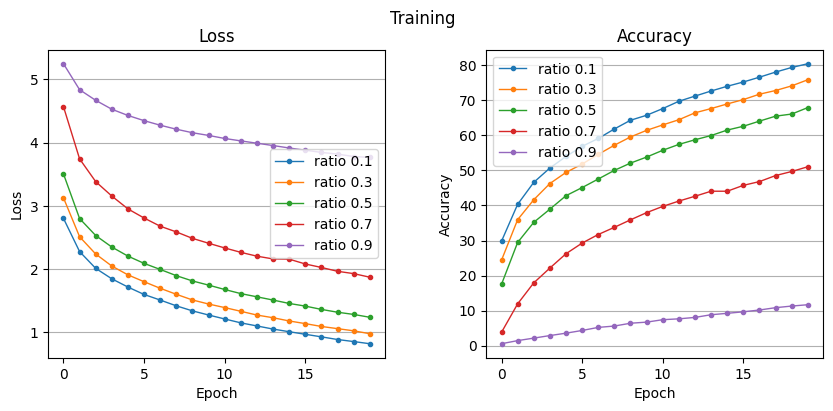

In [3]:
plot_train_metrics(data)

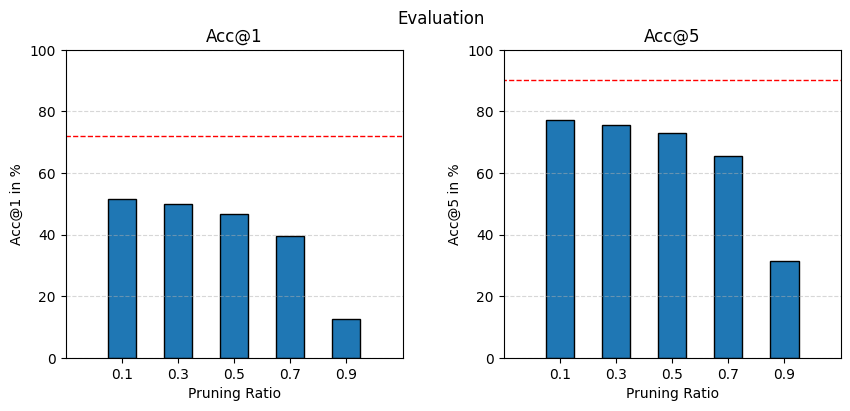

In [4]:
plot_test_metrics(data)

## Global Scaling-based Pruning vs. Uniform Scaling-based Pruning

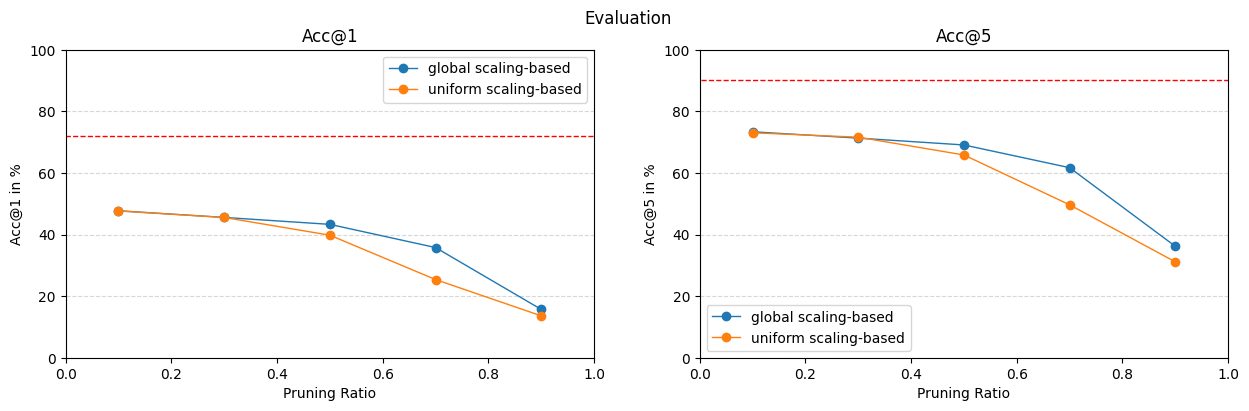

In [2]:
import json
with open('../runs/scaling_pruning/retraining.json', 'r') as f:
    data1 = json.load(f)
with open('../runs/uniform_scaling_pruning/retraining.json', 'r') as f:
    data2 = json.load(f)

datas = [data1, data2]
labels = ["global scaling-based", "uniform scaling-based"]

compare_test_metrics(datas, labels)

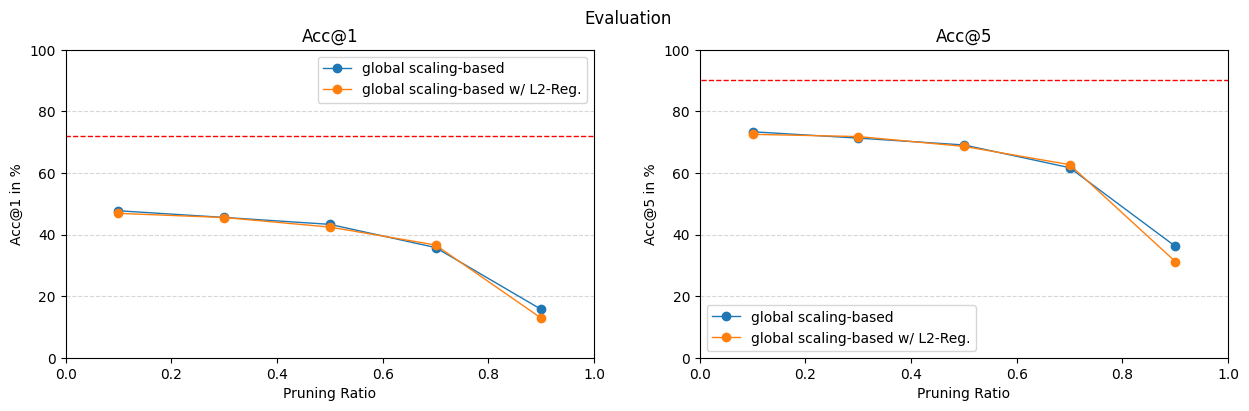

In [7]:
import json
with open('../runs/scaling_pruning/retraining.json', 'r') as f:
    data1 = json.load(f)
with open('../runs/global_pruning_magnitude_l2/retraining.json', 'r') as f:
    data2 = json.load(f)
with open('../runs/uniform_scaling_pruning/retraining.json', 'r') as f:
    data3 = json.load(f)

datas = [data1, data2]
labels = ["global scaling-based", "global scaling-based w/ L2-Reg."]

compare_test_metrics(datas, labels)

features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 features.13.conv.1.1 features.14.conv.1.1 features.15.conv.1.1 features.16.conv.1.1 features.17.conv.1.1
32    96    144   144   192   192   192   384   384   384   384   576   576   576   960   960   960  
22    86    122   137   134   120   155   180   119   105   251   259   226   249   454   439   510  
----------------------------------------------------------------------------------------------------
10    10    22    7     58    72    37    204   265   279   133   317   350   327   506   521   450  
features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 fe

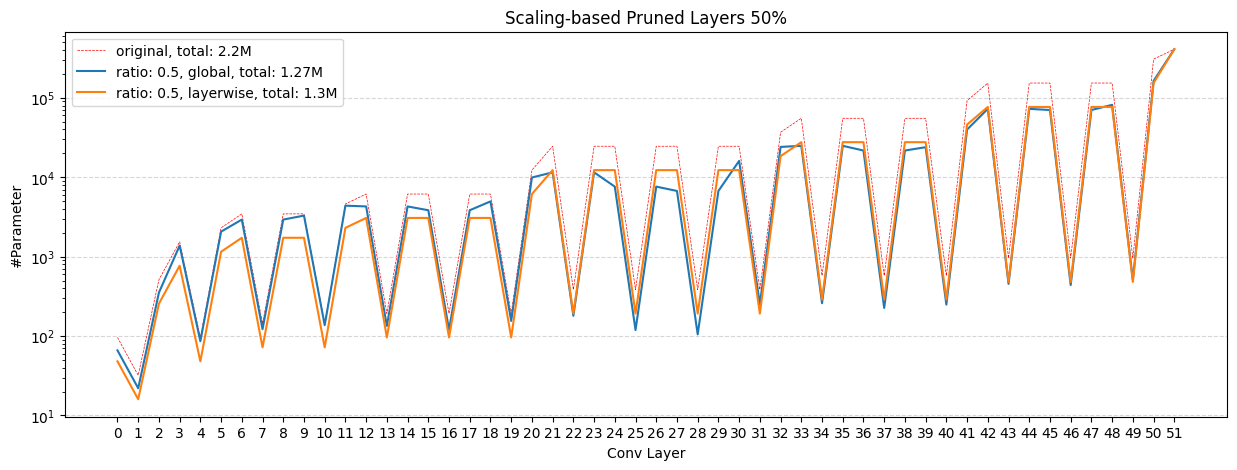

In [8]:
pruning_ratios = [0.5]

plt.figure(figsize=(15, 5))
plt.title("Scaling-based Pruned Layers 50%")

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.mobilenet_v2(weights='MobileNet_V2_Weights.IMAGENET1K_V1').to(DEVICE).eval()
pruning = Pruning(model, DEVICE)
data, total = pruning.count_parameters()

plot_cp(data, label=f"original, total: {total/1e6:.2}M", original=True)

pruned_layers = []
for i in range(1, 18):
    if i == 1:
        pruned_layers.append(f'features.{i}.conv.0.1')
        continue    
    pruned_layers.append(f'features.{i}.conv.1.1')

iter_ratios(pruned_layers, pruning_ratios, pruning_type='batchnorm', level="global")
iter_ratios(pruned_layers, pruning_ratios, pruning_type='batchnorm', level="layerwise")

features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 features.13.conv.1.1 features.14.conv.1.1 features.15.conv.1.1 features.16.conv.1.1 features.17.conv.1.1
32    96    144   144   192   192   192   384   384   384   384   576   576   576   960   960   960  
19    81    102   126   87    80    102   85    63    49    163   136   111   143   218   276   300  
----------------------------------------------------------------------------------------------------
13    15    42    18    105   112   90    299   321   335   221   440   465   433   742   684   660  
features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 fe

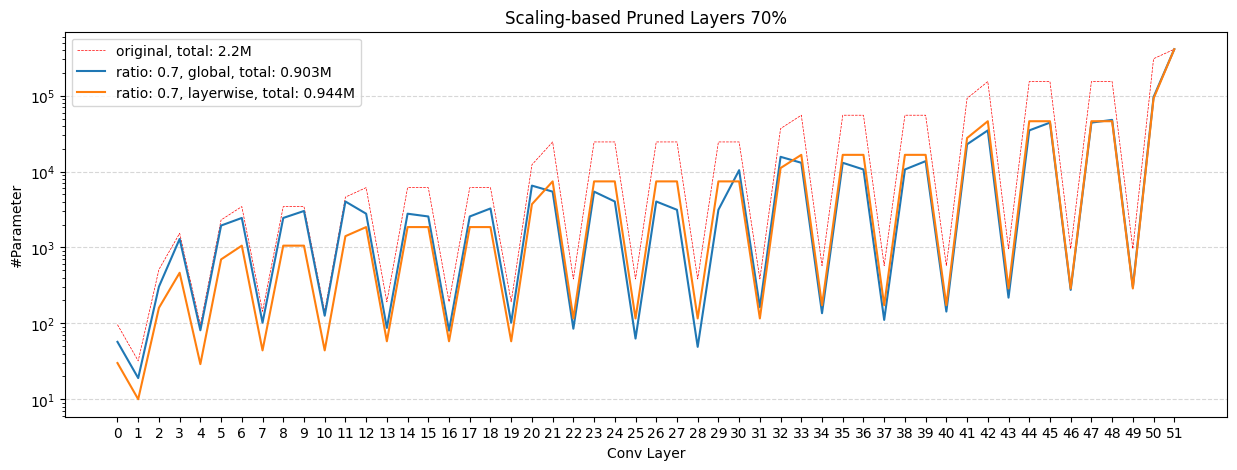

In [9]:
pruning_ratios = [0.7]

plt.figure(figsize=(15, 5))
plt.title("Scaling-based Pruned Layers 70%")

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.mobilenet_v2(weights='MobileNet_V2_Weights.IMAGENET1K_V1').to(DEVICE).eval()
pruning = Pruning(model, DEVICE)
data, total = pruning.count_parameters()

plot_cp(data, label=f"original, total: {total/1e6:.2}M", original=True)

pruned_layers = []
for i in range(1, 18):
    if i == 1:
        pruned_layers.append(f'features.{i}.conv.0.1')
        continue    
    pruned_layers.append(f'features.{i}.conv.1.1')

iter_ratios(pruned_layers, pruning_ratios, pruning_type='batchnorm', level="global")
iter_ratios(pruned_layers, pruning_ratios, pruning_type='batchnorm', level="layerwise")

## Iterative Pruning vs. Retraining

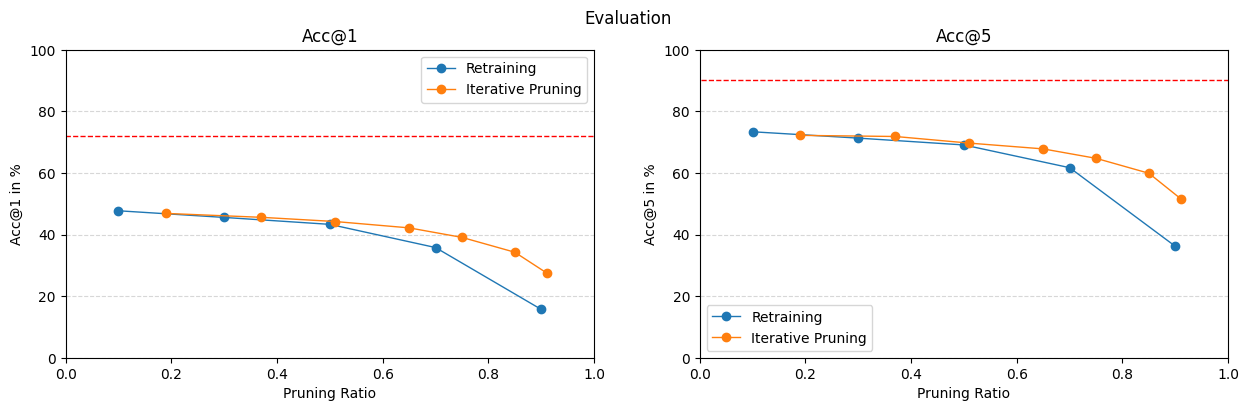

In [2]:
import json
with open('../runs/scaling_pruning/retraining.json', 'r') as f:
    data1 = json.load(f)
with open('../runs/iterative_pruning/iterative_pruning.json', 'r') as f:
    data2 = json.load(f)

datas = [data1, data2]
labels = ["Retraining", "Iterative Pruning"]

compare_test_metrics(datas, labels)

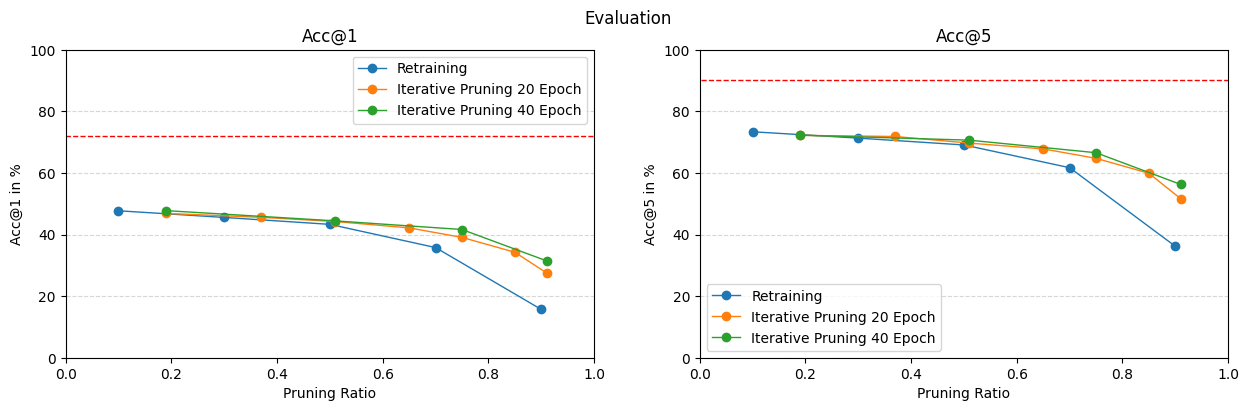

In [3]:
with open('../runs/scaling_pruning/retraining.json', 'r') as f:
    data1 = json.load(f)
with open('../runs/iterative_pruning/iterative_pruning.json', 'r') as f:
    data2 = json.load(f)
with open('../runs/iterative_pruning/iterative_pruning_40.json', 'r') as f:
    data3 = json.load(f)
datas = [data1, data2, data3]
labels = ["Retraining", "Iterative Pruning 20 Epoch", "Iterative Pruning 40 Epoch"]

compare_test_metrics(datas, labels)

## Knowledge Distillation Methods

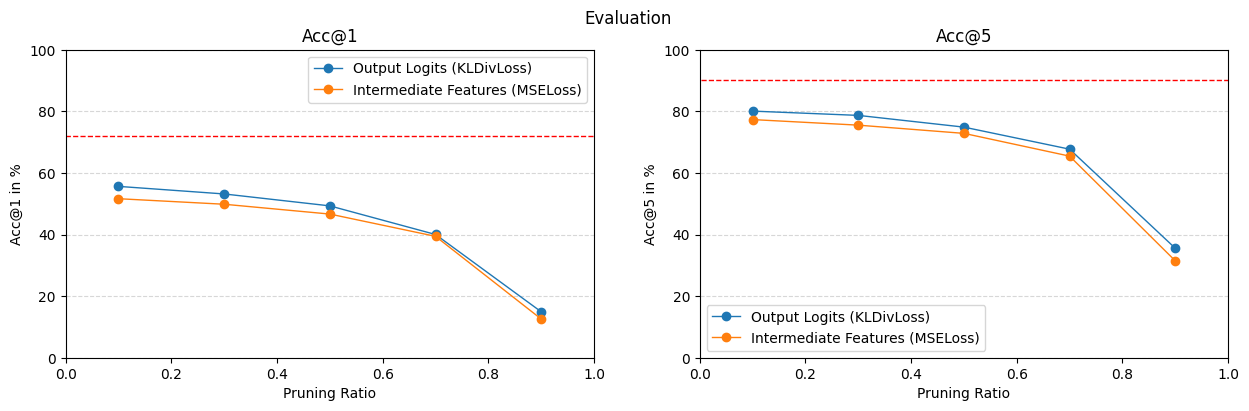

In [5]:
with open('../runs/knowledge_distillation/logits_kd.json', 'r') as f:
    data1 = json.load(f)
with open('../runs/knowledge_distillation/intermediate_kd.json', 'r') as f:
    data2 = json.load(f)

datas = [data1, data2]
labels = ["Output Logits (KLDivLoss)", "Intermediate Features (MSELoss)"]

compare_test_metrics(datas, labels)

## Iterative Pruning vs. Knowledge Distillation

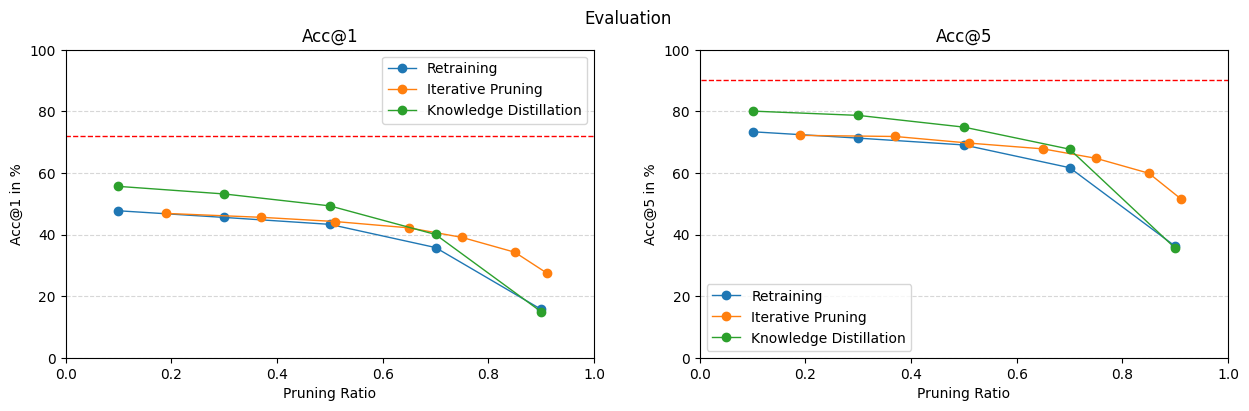

In [7]:
import json
with open('../runs/scaling_pruning/retraining.json', 'r') as f:
    data1 = json.load(f)
with open('../runs/iterative_pruning/iterative_pruning.json', 'r') as f:
    data2 = json.load(f)
with open('../runs/knowledge_distillation/logits_kd.json', 'r') as f:
    data3 = json.load(f)

datas = [data1, data2, data3]
labels = ["Retraining", "Iterative Pruning", "Knowledge Distillation", "Knowledge Distillation"]

compare_test_metrics(datas, labels)

features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 features.13.conv.1.1 features.14.conv.1.1 features.15.conv.1.1 features.16.conv.1.1 features.17.conv.1.1
32    96    144   144   192   192   192   384   384   384   384   576   576   576   960   960   960  
19    81    102   126   87    80    102   85    63    49    163   136   111   143   218   276   300  
----------------------------------------------------------------------------------------------------
13    15    42    18    105   112   90    299   321   335   221   440   465   433   742   684   660  
features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 fe

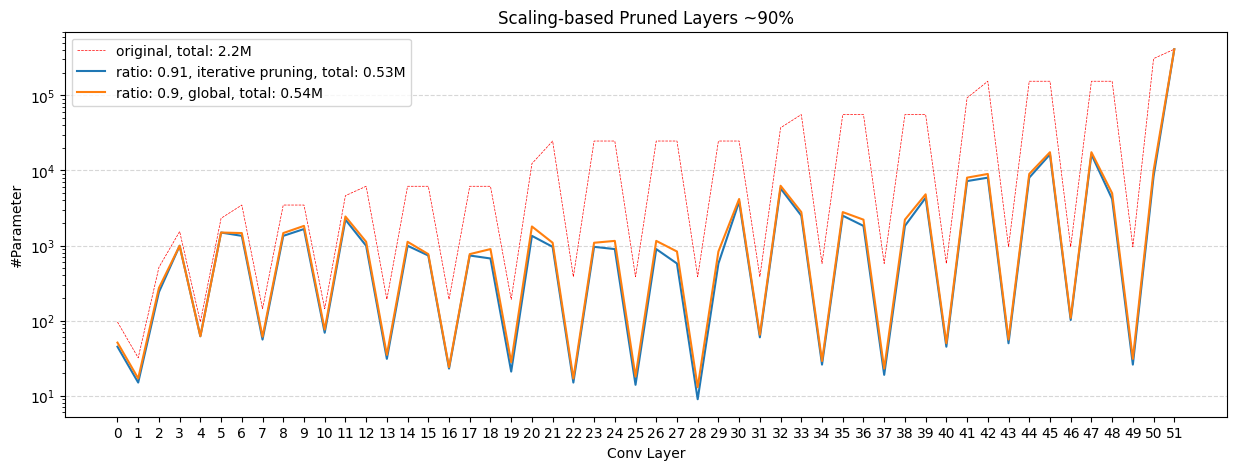

In [15]:
pruning_ratios = [0.9]
iter_pruning_ratios = [0.7, 0.7]

plt.figure(figsize=(15, 5))
plt.title("Scaling-based Pruned Layers ~90%")

# Original
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.mobilenet_v2(weights='MobileNet_V2_Weights.IMAGENET1K_V1').to(DEVICE).eval()
pruning = Pruning(model, DEVICE)
data, total = pruning.count_parameters()

plot_cp(data, label=f"original, total: {total / 1e6:.2}M", original=True)

# Iterative Pruning
ratio = calc_total_ratio(iter_pruning_ratios)
for r in iter_pruning_ratios:
    model = pruning.scaling_based_pruning(batch_norms=pruned_layers, pruning_ratio=r, level="global")
pruning = Pruning(model, DEVICE)
data, total = pruning.count_parameters()

plot_cp(data, label=f"ratio: {ratio:.2f}, iterative pruning, total: {total / 1e6:.2}M")

# Retraining
pruned_layers = []
for i in range(1, 18):
    if i == 1:
        pruned_layers.append(f'features.{i}.conv.0.1')
        continue
    pruned_layers.append(f'features.{i}.conv.1.1')

iter_ratios(pruned_layers, pruning_ratios, pruning_type='batchnorm', level="global")



## Hyperparameter Tuning

### Add data augmentation

In [19]:
with open('../runs/scaling_pruning/retraining_fliph.json', 'r') as f:
    data1 = json.load(f)

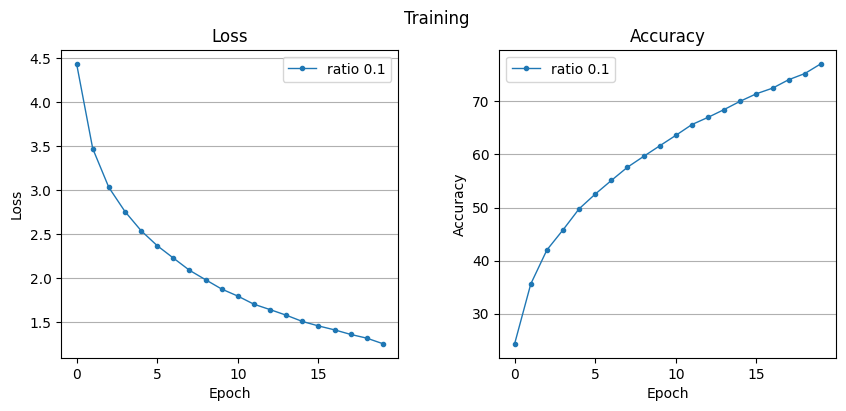

In [20]:
plot_train_metrics(data1)

### Bigger batchsize

In [21]:
with open('../runs/scaling_pruning/retraining_bs32.json', 'r') as f:
    data2 = json.load(f)

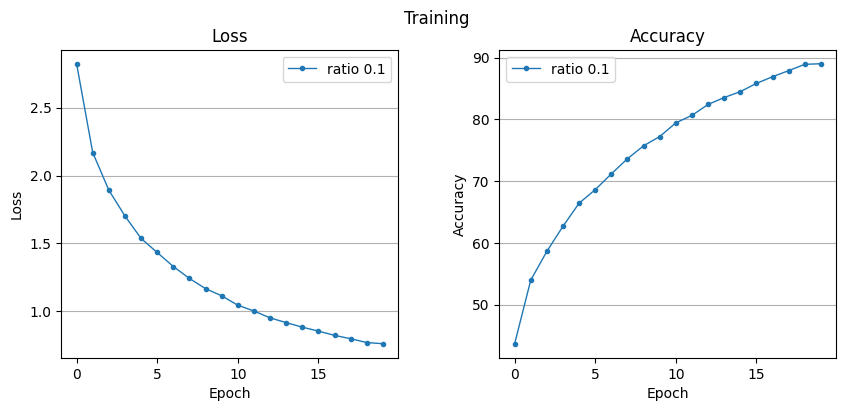

In [22]:
plot_train_metrics(data2)

### Evaluation

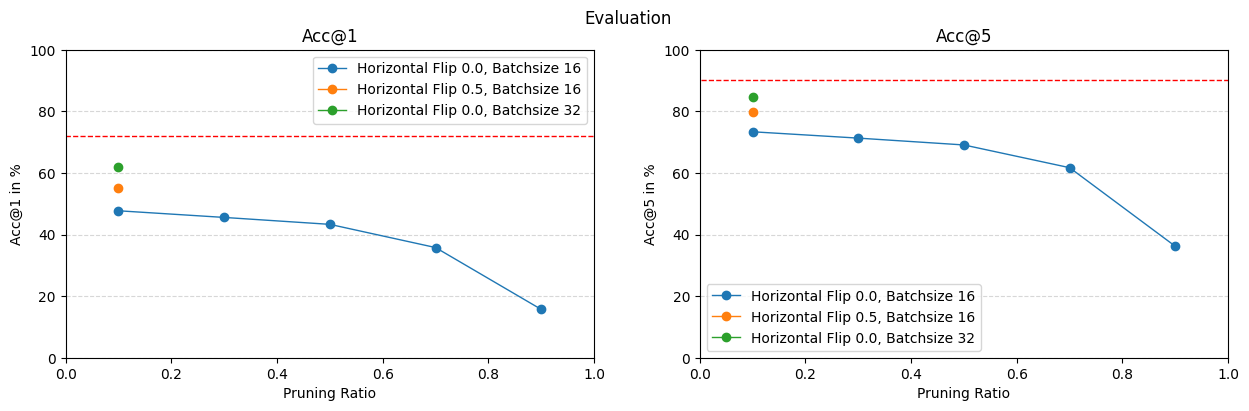

In [24]:
with open('../runs/scaling_pruning/retraining.json', 'r') as f:
    data0 = json.load(f)  
datas = [data0, data1, data2]
labels = ["Horizontal Flip 0.0, Batchsize 16", "Horizontal Flip 0.5, Batchsize 16", "Horizontal Flip 0.0, Batchsize 32"]

compare_test_metrics(datas, labels)

## Inference Speed

features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 features.13.conv.1.1 features.14.conv.1.1 features.15.conv.1.1 features.16.conv.1.1 features.17.conv.1.1
32    96    144   144   192   192   192   384   384   384   384   576   576   576   960   960   960  
23    94    137   144   181   178   191   344   317   313   378   514   501   519   896   875   818  
----------------------------------------------------------------------------------------------------
9     2     7     0     11    14    1     40    67    71    6     62    75    57    64    85    142  
features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 fe

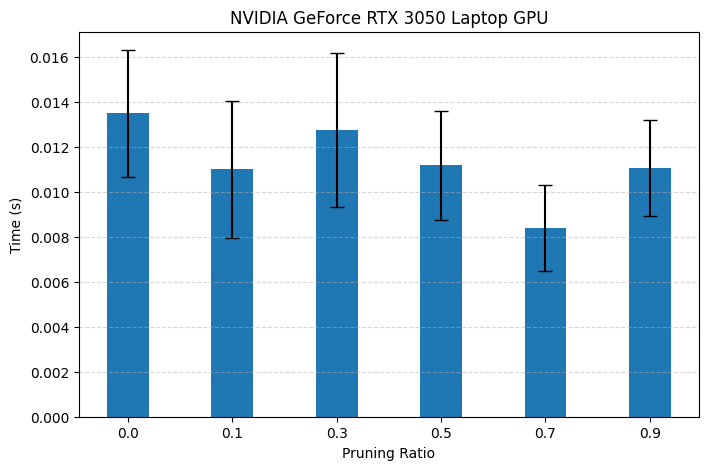

In [3]:
pruning_ratios = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9]
device = torch.device("cuda")
title = "NVIDIA GeForce RTX 3050 Laptop GPU"

plot_speed(pruning_ratios, title=title, device=device)

features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 features.13.conv.1.1 features.14.conv.1.1 features.15.conv.1.1 features.16.conv.1.1 features.17.conv.1.1
32    96    144   144   192   192   192   384   384   384   384   576   576   576   960   960   960  
23    94    137   144   181   178   191   344   317   313   378   514   501   519   896   875   818  
----------------------------------------------------------------------------------------------------
9     2     7     0     11    14    1     40    67    71    6     62    75    57    64    85    142  
features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 fe

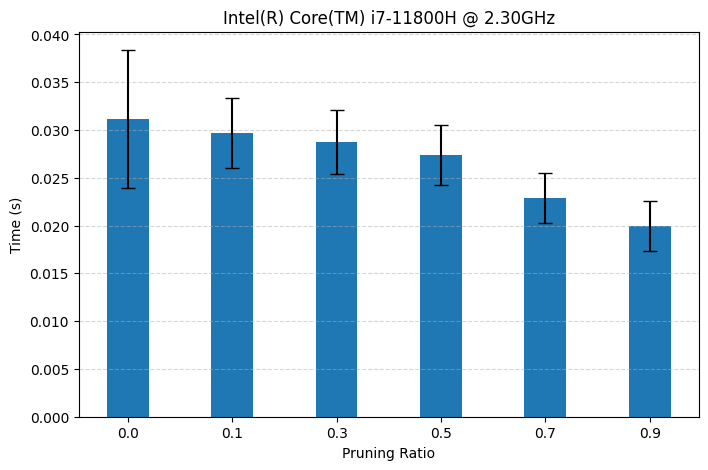

In [4]:
pruning_ratios = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9]
device = torch.device("cpu")
title = "Intel(R) Core(TM) i7-11800H @ 2.30GHz"

plot_speed(pruning_ratios, title=title, device=device)


features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 features.13.conv.1.1 features.14.conv.1.1 features.15.conv.1.1 features.16.conv.1.1 features.17.conv.1.1
32    96    144   144   192   192   192   384   384   384   384   576   576   576   960   960   960  
23    94    137   144   181   178   191   344   317   313   378   514   501   519   896   875   818  
----------------------------------------------------------------------------------------------------
9     2     7     0     11    14    1     40    67    71    6     62    75    57    64    85    142  
features.1.conv.0.1 features.2.conv.1.1 features.3.conv.1.1 features.4.conv.1.1 features.5.conv.1.1 features.6.conv.1.1 features.7.conv.1.1 features.8.conv.1.1 features.9.conv.1.1 features.10.conv.1.1 features.11.conv.1.1 features.12.conv.1.1 fe

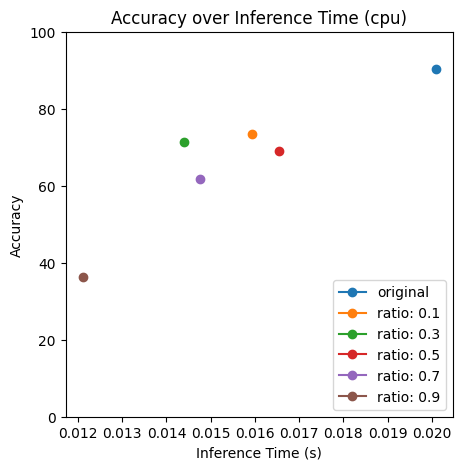

In [2]:
with open('../runs/scaling_pruning/retraining.json', 'r') as f:
    data = json.load(f)  

pruning_ratios = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9]
device = torch.device("cpu")

plot_speed_acc(data, pruning_ratios, device=device)